<a href="https://colab.research.google.com/github/morreh89/Week-4-IP/blob/master/Autolib_Hypothesis_Testing_Notebook_week_4_Core_Maurice_Kimanzi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pip install pandas-profiling==2.8.0


In [6]:
#Import libraries
#Reading the Data
# Importing Numpy
import numpy as np

# Importing Pandas
import pandas as pd

# Importing Matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Seaborn
import seaborn as sns
anomalies = []
import seaborn as sb
# importing linear regression from sci kit learn
from sklearn.linear_model import LinearRegression

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm
# importing random module
# I will use random.sample() function to return a k length 
# list of unique elements chosen from our population
import random

In [7]:

# Loading and Reading the data from the CSV file and create the dataframe to be used
 
url = 'http://bit.ly/DSCoreAutolibDataset'
autolib=pd.read_csv(url, encoding='utf-8')
# Preview random data within the dataset 
autolib.take(np.random.permutation(len(autolib))[:10])

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
11234,93300,2/28/2018,1429,2,weekday,8,6,0,0,1,1,0,0
11291,93300,4/26/2018,1440,3,weekday,10,11,0,0,0,0,0,0
13714,94130,5/8/2018,1425,1,weekday,67,65,3,1,0,1,0,0
8868,92390,6/12/2018,1439,1,weekday,10,11,1,0,0,0,0,0
6290,92220,2/23/2018,1440,4,weekday,64,62,4,3,7,5,0,0
14546,94300,1/21/2018,1440,6,weekend,84,94,1,0,4,4,0,0
744,75005,5/4/2018,1435,4,weekday,283,281,6,6,21,20,100,94
7571,92310,3/31/2018,1440,5,weekend,51,52,3,6,3,5,0,0
8840,92390,5/4/2018,1435,4,weekday,10,14,0,0,1,2,0,0
3444,78000,1/14/2018,1440,6,weekend,70,62,2,1,7,7,0,0


In [8]:
# preview the dataset's glossary

autogloss=pd.read_excel('columns_explanation.xlsx')
autogloss

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [9]:
# Knowing more about the dataset by accessing its information
autolib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


# **Cleaning the dataset**
Once the previewing is done I'll go ahead and find and deal with outliers, anomalies, and missing data within the dataset so as to make sure the data is clean before proceeding to its analysis.

In [10]:
# Checking the dataset for any null values

autolib.isnull().any()

Postal code               False
date                      False
n_daily_data_points       False
dayOfWeek                 False
day_type                  False
BlueCars_taken_sum        False
BlueCars_returned_sum     False
Utilib_taken_sum          False
Utilib_returned_sum       False
Utilib_14_taken_sum       False
Utilib_14_returned_sum    False
Slots_freed_sum           False
Slots_taken_sum           False
dtype: bool

In [11]:
# Checking for any duplicates in the dataset
autolib.duplicated().any()
dup=autolib.duplicated().any()
dup

False

Tidy data is a standard way of mapping the meaning of a dataset to its structure.

In this section I purpose to check for outliers, drop unnessecary columns, convert index to datetime indexing

In [12]:
# Removing any untidyness from the dataset 
autolib.columns = autolib.columns.str.replace(' ', '').str.replace('_', '')
autolib

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Utilibtakensum,Utilibreturnedsum,Utilib14takensum,Utilib14returnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [13]:
autolib.columns


Index(['Postalcode', 'date', 'ndailydatapoints', 'dayOfWeek', 'daytype',
       'BlueCarstakensum', 'BlueCarsreturnedsum', 'Utilibtakensum',
       'Utilibreturnedsum', 'Utilib14takensum', 'Utilib14returnedsum',
       'Slotsfreedsum', 'Slotstakensum'],
      dtype='object')

In [14]:
# Drop columns
# the reason for dropping this columns is because they don't conntribute a lot towards  conclusion of accepting or rejecting our null hypothesis 
autolib.drop(columns=['Utilibtakensum','Utilibreturnedsum', 'Utilib14takensum', 'Utilib14returnedsum'],inplace=True)
autolib.head(2)

,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22


AxesSubplot(0.125,0.125;0.775x0.755)


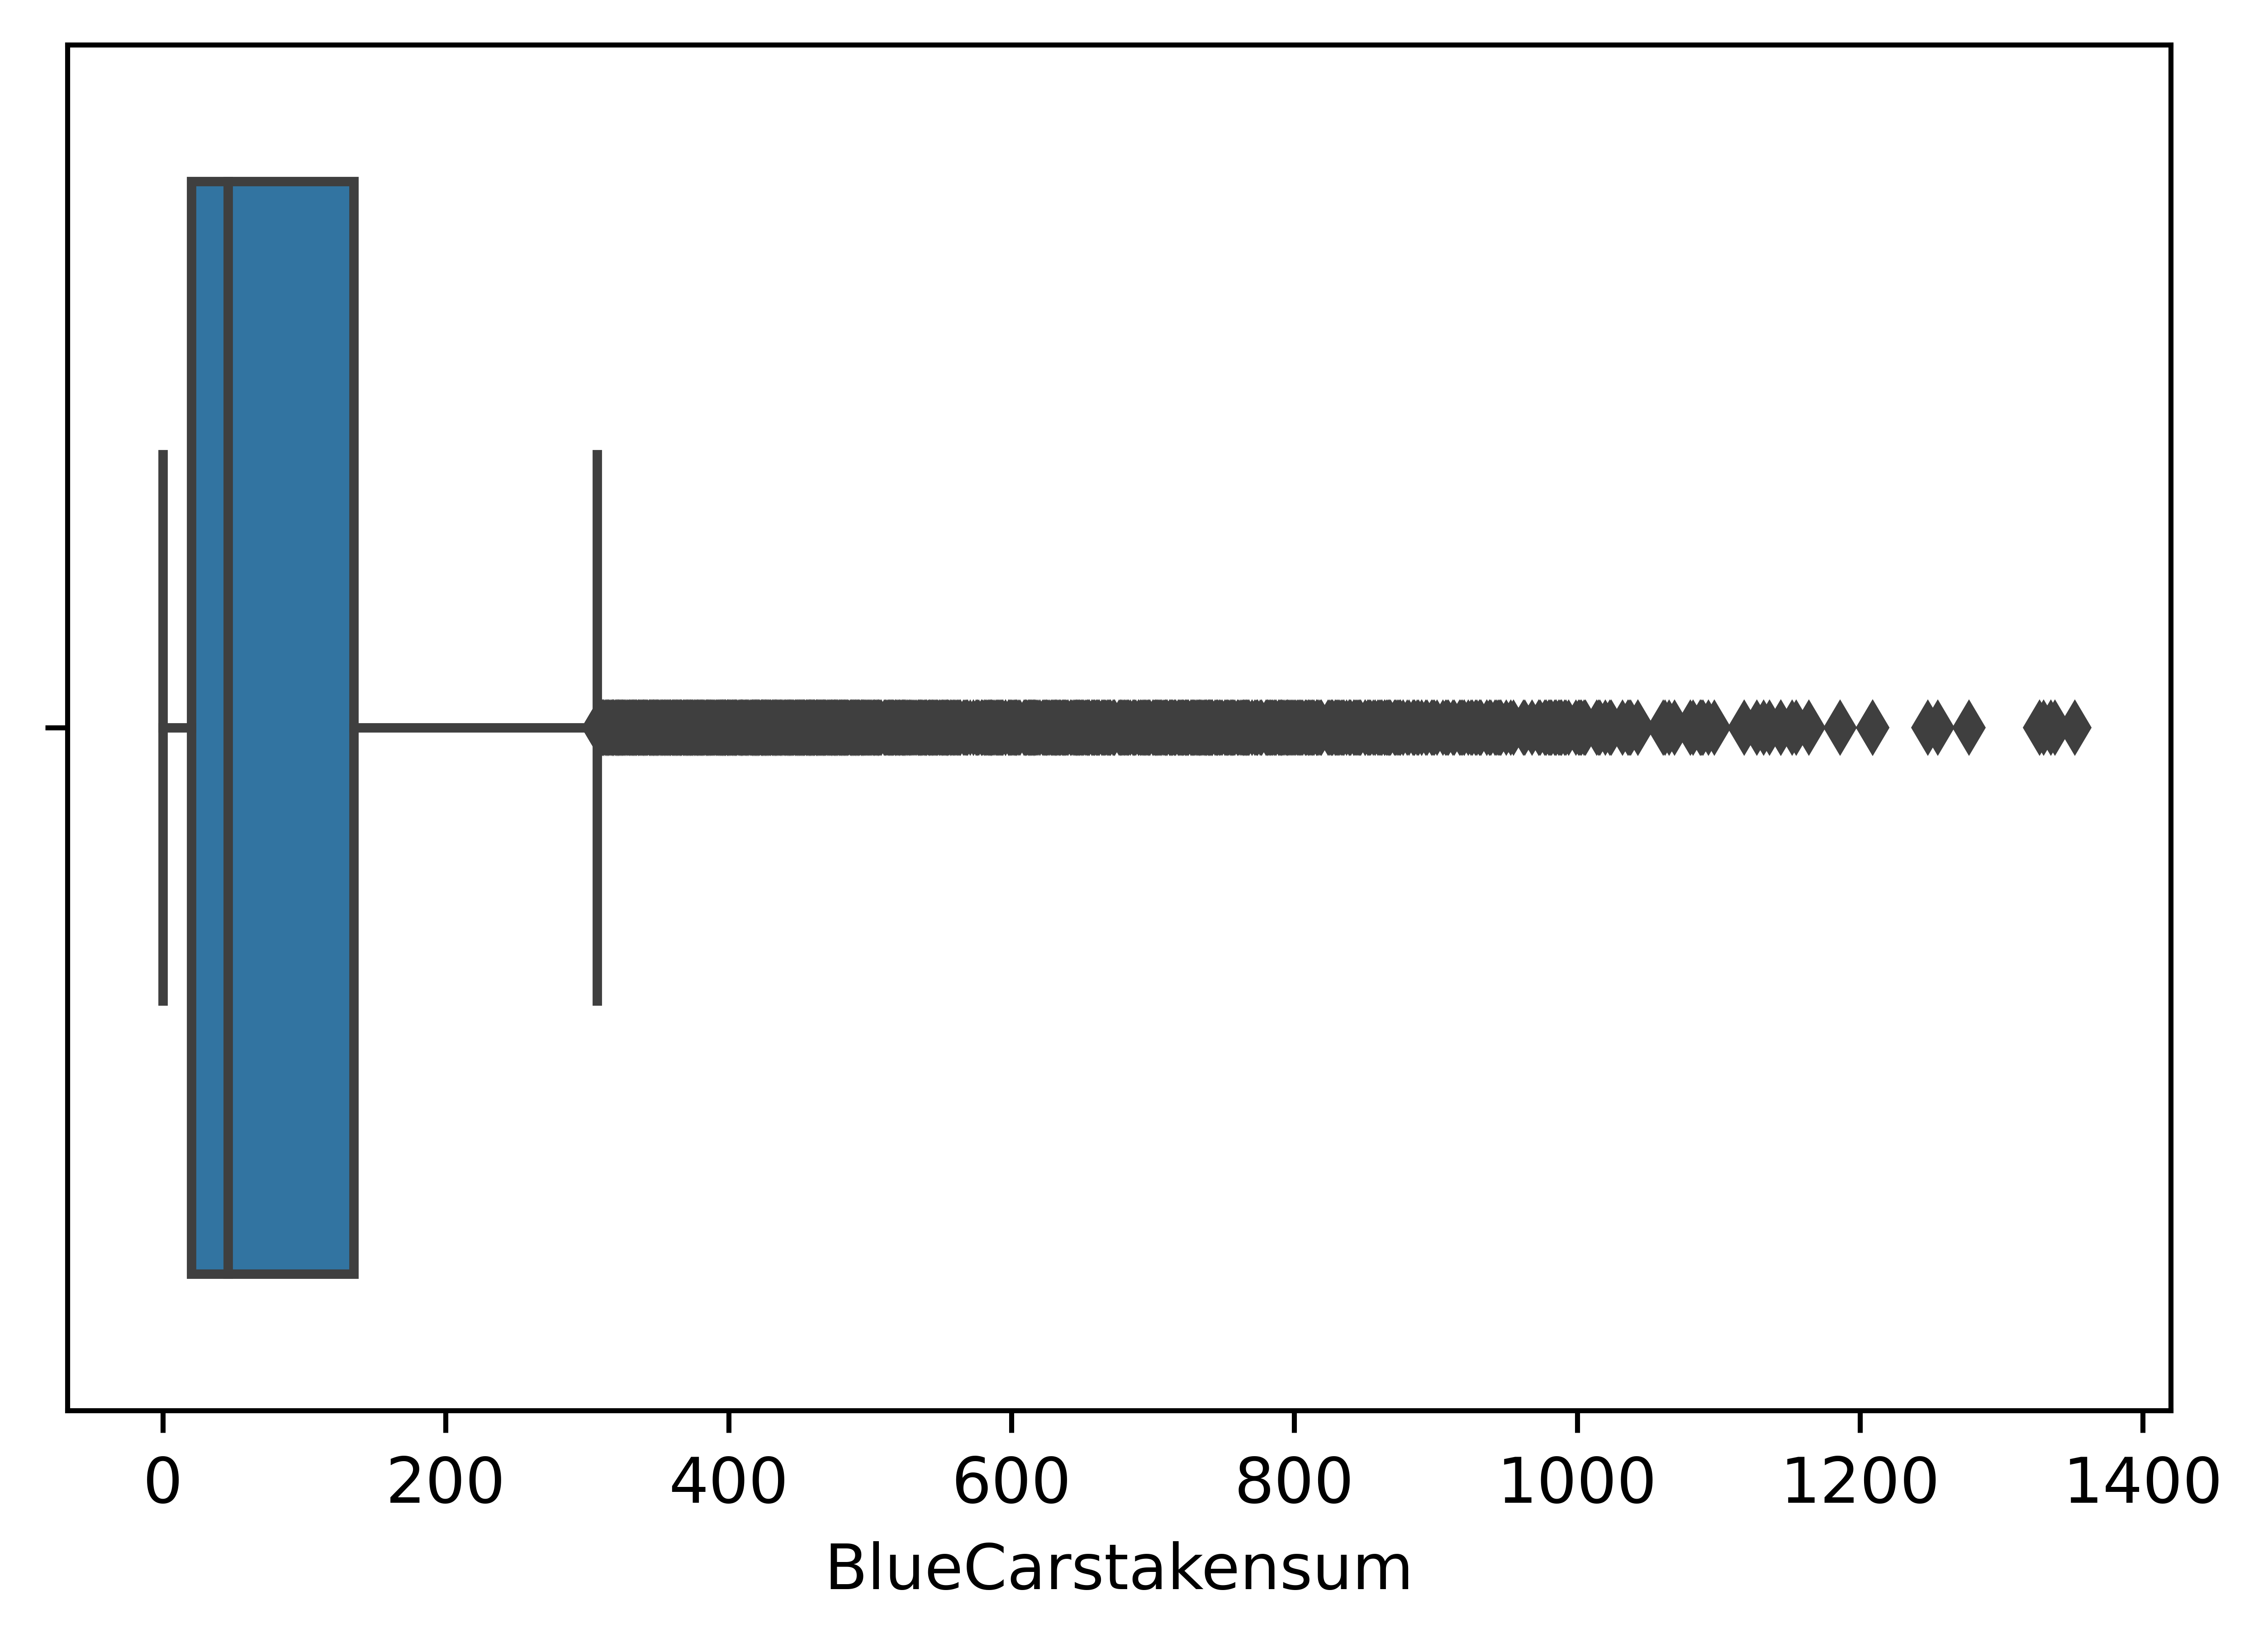

In [15]:
#Checking for the outliers

plt.figure(dpi=1000)
print(sns.boxplot(autolib['BlueCarstakensum']))           

#Number of bluecars taken that date in that area were sparesely  spread from the mean

**Sampling Technique**

Before taking a step further to test our hypothesis and decide whether to reject it or not accept it, we will perform sampling since we don't need to work with the whole popuplation. Before choosing the best sampling technique we need to understand the sample that can be consistent, Diverse and has transpiracy of the whole data.

**Random Sampling**

Since we have created a new dataframe called auto1 that has only one dependent variable which is weekend,Random sampling would be the best method to apply compare to stratified sampling. We shall select 1000 rows.

In [16]:
# creating a dataframe that only weekends since we are interested with the weekend in order to test our hypothsis
auto1=autolib[autolib.daytype  == 'weekend']
auto1.shape

(4541, 9)

In [17]:
# random sampling of 1000 rows from the whole dataframe
auto1_sample=auto1.sample(n = 1000, replace="False")

print('Random sample of 1000 rows',auto1_sample.head())

Random sample of 1000 rows        Postalcode       date  ...  Slotsfreedsum  Slotstakensum
12198       93440   1/7/2018  ...              0              0
10539       93150  4/21/2018  ...              2              2
15756       95100   6/3/2018  ...              0              0
11199       93300  1/20/2018  ...              0              0
125         75001  5/20/2018  ...             25             26

[5 rows x 9 columns]


In [18]:
auto1_sample.shape


(1000, 9)


# Exploratory Data Analysis

**Univariate Analysis**


In is section we will get to explore about one variable at a time . Here we get to calculate the central tendacy, Measures of Dispersion/Variability/Spread e.g standard deviation,corelation and kurtosis. We aslo do Visualisation Techniques by using pie charts, and histogram

**Measures of Central Tendency**

Doing central Tendency helps us to get to know the mean number of bluecars , the rate at which they were taken, and the most the most hour they were taken.


In [79]:
autolib.describe()

,Postalcode,ndailydatapoints,dayOfWeek,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,360.000000,359.000000


In [19]:

# checking for the mean
print('mean of bluecars taken',auto1_sample['BlueCarstakensum'].mean())
print('mean of bluecars returned',auto1_sample['BlueCarsreturnedsum'].mean())


mean of bluecars taken 151.484
mean of bluecars returned 151.798


In [20]:
# checking for the mode
print('mode of bluecars taken',auto1_sample['BlueCarstakensum'].mode())
print('mode of bluecars returned',auto1_sample['BlueCarsreturnedsum'].mode())


mode of bluecars taken 0    20
1    28
dtype: int64
mode of bluecars returned 0    26
dtype: int64


In [21]:
# checking for median
print('median of bluecars taken',auto1_sample['BlueCarstakensum'].median())
print('median of bluecars taken',auto1_sample['BlueCarsreturnedsum'].median())

median of bluecars taken 52.5
median of bluecars taken 53.0


**Measures of Dispersion/ Variability/ Spread**


In [22]:
# In statistics and probability, quartiles are values that divide your data into quarters provided data is sorted in an ascending order. 
# There are three quartile values. First quartile value is at 25 percentile. 
# Second quartile is 50 percentile and third quartile is 75 percentile. 
# Second quartile (Q2) is median of the whole data. First quartile (Q1) is median of upper half of the data. 
# And Third Quartile (Q3) is median of lower half of the data.
# ---
print(auto1_sample['BlueCarstakensum'].quantile([0.25,0.5,0.75]))
print(auto1_sample['BlueCarsreturnedsum'].quantile([0.25,0.5,0.75]))
print(auto1_sample['ndailydatapoints'].quantile([0.25,0.5,0.75]))

0.25     26.0
0.50     52.5
0.75    139.5
Name: BlueCarstakensum, dtype: float64
0.25     25.0
0.50     53.0
0.75    137.0
Name: BlueCarsreturnedsum, dtype: float64
0.25    1440.0
0.50    1440.0
0.75    1440.0
Name: ndailydatapoints, dtype: float64


In [23]:
# calculating the range between the maximum number of bluecars that were taken and the minimum  number of bluecars that were taken per area 
(auto1['BlueCarstakensum'].max()) - (auto1['BlueCarsreturnedsum'].min())

1352

# **Skewness**

In Skewness we are interested to measure the asymmetry of the probability distribution of our data
we expect our skwness value to be either a positive or negative, or undefined.
If we get that distribution is skewed to the left, the tail on the curve’s left-hand side is longer than the tail on the right-hand side,it will mean that mean is less than the mode. This situation is also called negative skewness

If our distribution is skewed to the right, the tail on the curve’s right-hand side is longer than the tail on the left-hand side,
This situation is also called positive skewness

In [24]:

# checking for skewness 
print('skewness of bluecars',auto1['BlueCarstakensum'].skew())
print('skewness of data_point',auto1['ndailydatapoints'].skew())
# the  distribution of bluecars taken  is positively skewed  with a skewness value 2.3007.
#This mean that the  mean is spaced from the mode  by a posive vale of 2.3007

# The number distribution curve of number of daily data point is negatively skewed with a value of -4.53312,
#This means that the mean of the data point is negatively skewed, e.i  the mean  is less than the mode and the median

skewness of bluecars 2.3007208190452824
skewness of data_point -4.53311740557901


# **Kurtosis**
Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [25]:
# checking for kurtosis
print('Kurtosis of bluecars taken',auto1['BlueCarstakensum'].kurt())
print('Kurtosid of data_point',auto1['ndailydatapoints'].kurt())
# in the first  and the second values we  got positive values,
#this is called Leptokurtic,this type of kurtosis indicates 
#a positive excess kurtosis distribution from normal one

Kurtosis of bluecars taken 5.295039714140337
Kurtosid of data_point 20.764613726182784


# **Univariate Visualisation Techniques**

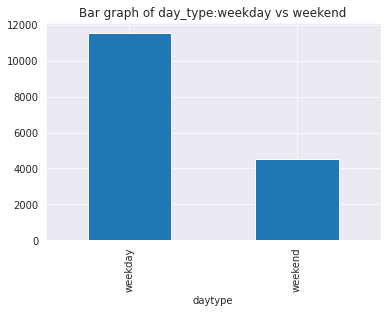

In [26]:
sns.set_style('darkgrid')
autolib.groupby('daytype')['daytype'].count().plot(kind='bar')
plt.title('Bar graph of day_type:weekday vs weekend')
plt.show()
#the bar graph represent that the number of bluecars which were taken on
#weekday were almost thrice the number of bluecars which were taken on weekend

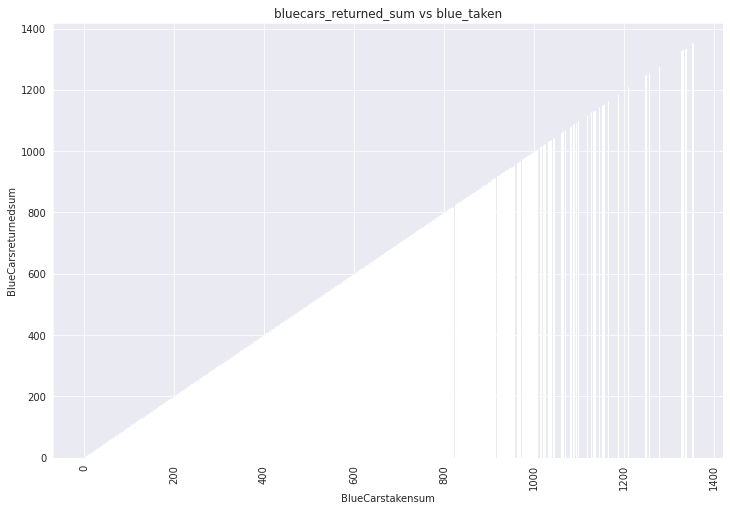

In [27]:
fig, ax = plt.subplots(figsize=(12,8))
ax.bar(autolib.BlueCarstakensum, autolib.BlueCarstakensum, color='blue')
plt.xticks(rotation=90)
ax.set_xlabel('BlueCarstakensum')
ax.set_ylabel('BlueCarsreturnedsum')
plt.title('bluecars_returned_sum vs blue_taken')
plt.show()
# the bar graph  shows that as the Number of bluecars taken that date in that area increases the 
#Number of bluecars returned that date in that area also increases.

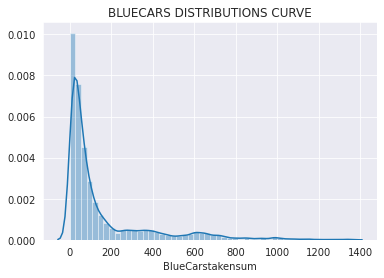

In [28]:
sns.distplot(auto1.BlueCarstakensum, kde = True)
plt.title('BLUECARS DISTRIBUTIONS CURVE')
plt.show()
#based on the distribution curve that we plotted we can say that the curve is positively skewed
#It is between the range of 0 to 150 that we have a high number of cars
#that were taken comapred to other range bracket.
# Under this range 0- 150 we have more  variables that are distributed away from the mean,
#this can be demonstarted by the shapeness of the curve.

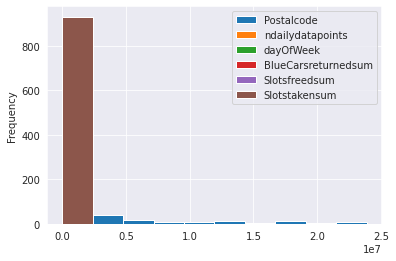

In [29]:
autolib.groupby('BlueCarstakensum').sum().plot(kind='hist')
#plt.title('freguency of variables in each column')
#plt.title("freguency of variables in each column")

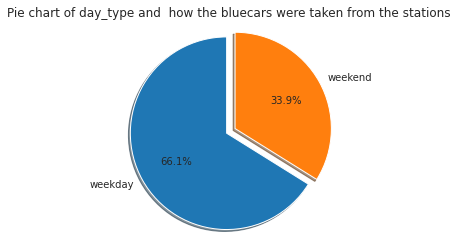

In [30]:
df=autolib.groupby('daytype').BlueCarstakensum.sum()
explode=[0,0.1,]
label=['weekday','weekend']
plt.pie(df, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of day_type and  how the bluecars were taken from the stations ')
plt.show() 
#From the pie we can deduce that the number of bluecars which were taken on weekend
#represented 33.9% the total number of bluecars while 66.1% on weekday

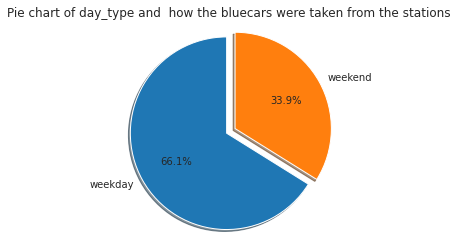

In [31]:
dd=autolib.groupby('daytype').BlueCarstakensum.sum()
explode = [0,0.1,]
label=['weekday','weekend']
plt.pie(dd, explode=explode, labels=label ,autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.title('Pie chart of day_type and  how the bluecars were taken from the stations ')
plt.show() 
#From the pie we can deduce that the number of bluecars which were returned on weekend 
#was 33.9% while those that were taken on weekday were  66.1%

# **Bivariate analysis**

# Measures of Central Tendency

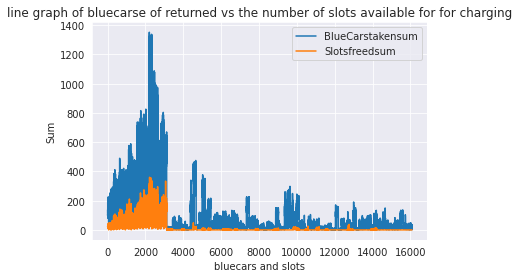

In [32]:
autolib[['BlueCarstakensum','Slotsfreedsum']].plot()
plt.title('line graph of bluecarse of returned vs the number of slots available for for charging')
plt.xlabel('bluecars and slots')
plt.ylabel('Sum')
plt.show()

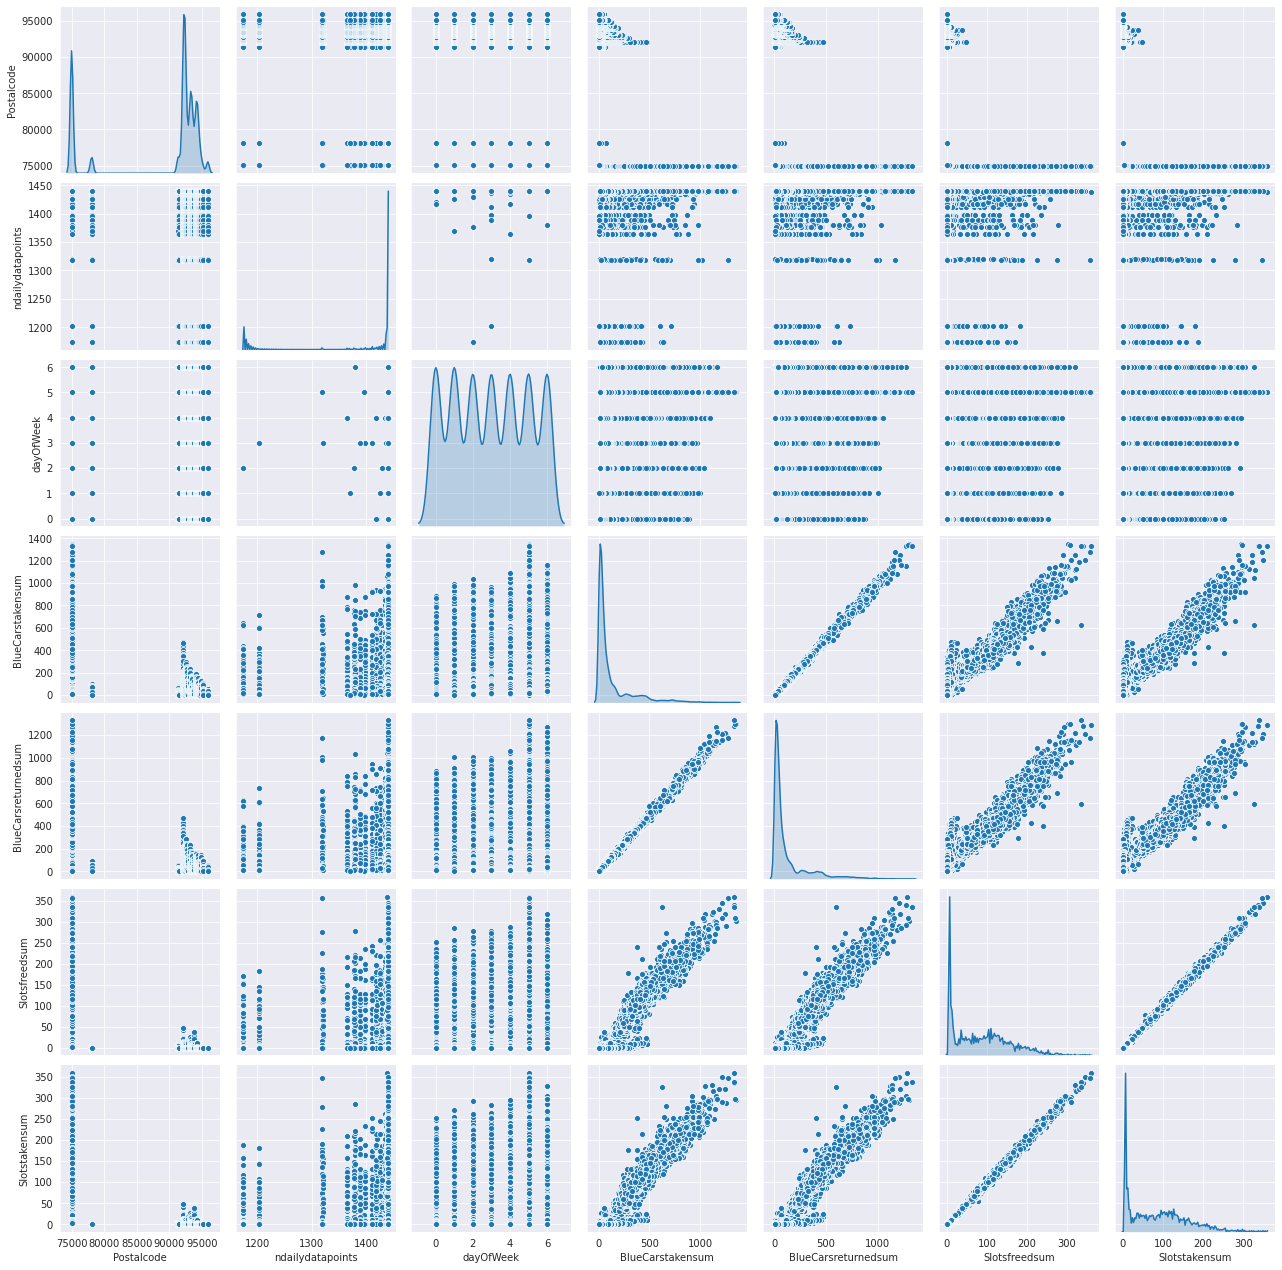

In [33]:

sns.pairplot(autolib, diag_kind='kde');
# Heat plot  helped  in visualizing the distribution of  variable, how they are skewed, either positive or negatively skewed, It also helped in checking how the variable were
# spread from the mean.

In [34]:
auto1.head()


,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,41,39


# **Scatter plot**

Text(0, 0.5, 'bluecars returned sum')

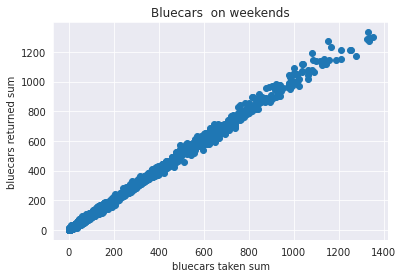

In [35]:
fig, ax = plt.subplots()
colors={'BlueCarstakensum':'r','BlueCarsreturnedsum':'b'}
#color= colors[auto1]
# scatter the bluecars taken  against the blucars returned
ax.scatter(auto1['BlueCarstakensum'], auto1['BlueCarsreturnedsum'])

# set a title and labels

ax.set_title('Bluecars  on weekends')
ax.set_xlabel('bluecars taken sum')
ax.set_ylabel('bluecars returned sum')
# both bluecars taken and those returned they appear to have linear regression 
# Reason is beacuse the rate at which  bluecars were taken is almost  the same rate bluecars were  returned.

In [36]:
auto1.columns

Index(['Postalcode', 'date', 'ndailydatapoints', 'dayOfWeek', 'daytype',
       'BlueCarstakensum', 'BlueCarsreturnedsum', 'Slotsfreedsum',
       'Slotstakensum'],
      dtype='object')

No handles with labels found to put in legend.


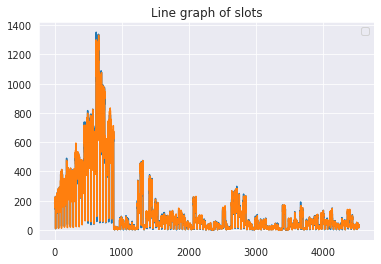

In [37]:
# get columns to plot
columns = auto1.columns.drop(['date','dayOfWeek','Postalcode','Slotsfreedsum',	'Slotstakensum','ndailydatapoints','daytype'])

#create x data
x_data = range(0, auto1.shape[0])

# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, auto1[column])
# set title and legend
ax.set_title('Line graph of slots')
ax.legend()

In [39]:
#Correlation
#Correlation is a statistical measure that describes the association between random variables. 
#In this section, will use pandas to calculate the correlation coefficient. 
#We will calculate the pearson correlation coefficient which is the most widely used correlation coefficient.

 #Determine the relationship between the repondents age in relation  households sizes 
# Calculating the pearson coefficient
p_coeff = autolib["BlueCarstakensum"].corr(autolib["BlueCarsreturnedsum"], method="pearson") 
print('correlation',p_coeff)

# Checking whether you have to define the pearson
coeff = autolib["BlueCarstakensum"].corr(autolib["Slotsfreedsum"]) 
print('correlation',coeff)
# Correlation coefficients between -0.20 and 0.20 are generally considered weak, 
# A negative (inverse) correlation occurs when the correlation coefficient is less than 0 
# and indicates that both variables  are know to move in the opposite direction. 
#In both case, btween bluecars  taken, bluecars returned and slots available for feeding they all had a strong correlation, the hae a correlation of almost 1

correlation 0.9986597051672199
correlation 0.9485748412412782


In [42]:
#CAR.groupby(['ID','Bluecar counter'])['Bluecar counter'].sum().sort_values(ascending=False).head()


autolib.groupby(by='daytype').sum()

,Postalcode,ndailydatapoints,dayOfWeek,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
daytype,,,,,,,
weekday,1024991290,16508004,22787,1339435,1334941,241791,241517
weekend,403216672,6514949,24979,686100,690365,122197,122475


In [46]:
autolib.groupby(['dayOfWeek','Postalcode','BlueCarstakensum'])[['BlueCarsreturnedsum']].sum().sort_values(by='dayOfWeek',ascending=False)


BlueCarsreturnedsum
dayOfWeek Postalcode BlueCarstakensum                     
6         95880      49                                 47
          92120      79                                 83
          92110      23                                 20
                     24                                 41
                     25                                 24
...                                                    ...
0         93100      138                               275
                     140                               124
          93110      11                                 18
                     18                                 46
          75001      83                                 81

[11894 rows x 1 columns]

In [49]:
# checking which number of blucars that were taken on Sutarday and sunday
autolib.groupby('dayOfWeek').BlueCarstakensum.sum()


# Based on the results , most blues were taken  on sutardays than on sundays

dayOfWeek
0    263893
1    261940
2    261849
3    263207
4    288546
5    353934
6    332166
Name: BlueCarstakensum, dtype: int64

In [55]:
autod=autolib[autolib.dayOfWeek == '5']
autod.head
print('Dataframe of bluecars taken and  returned on sutarday',autod)


auto1=autolib[autolib.daytype  == 'weekend']
auto1

Dataframe of bluecars taken and  returned on sutarday Empty DataFrame
Columns: [Postalcode, date, ndailydatapoints, dayOfWeek, daytype, BlueCarstakensum, BlueCarsreturnedsum, Slotsfreedsum, Slotstakensum]
Index: []


/usr/local/lib/python3.6/dist-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
5,75001,1/6/2018,1437,5,weekend,187,185,38,35
6,75001,1/7/2018,1440,6,weekend,180,180,34,34
12,75001,1/13/2018,1440,5,weekend,224,223,38,38
13,75001,1/14/2018,1440,6,weekend,193,193,22,20
19,75001,1/20/2018,1439,5,weekend,217,217,41,39
...,...,...,...,...,...,...,...,...,...
16068,95880,6/3/2018,1440,6,weekend,36,33,0,0
16074,95880,6/9/2018,1440,5,weekend,15,15,0,0
16075,95880,6/10/2018,1440,6,weekend,34,32,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0


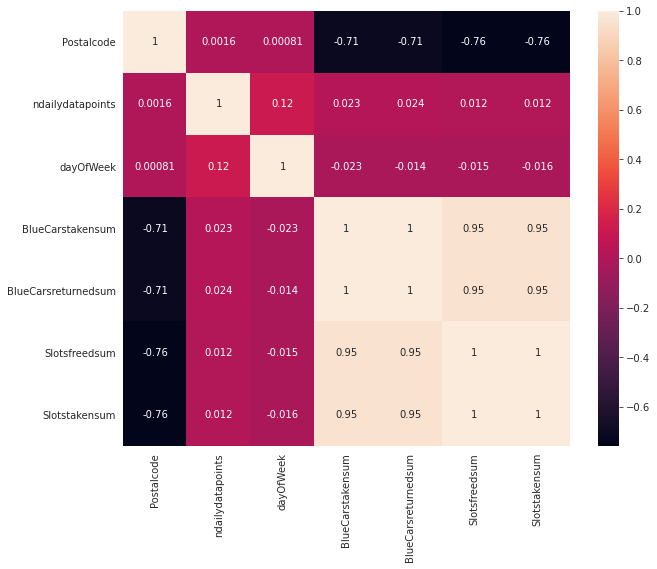

In [56]:
f, ax = plt.subplots(figsize=(10, 8))
corr = auto1.corr()
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
          annot = True)
#  variables with   correlation  more than 0.5 or -0.5 are highly correlated

# **Multivariate Analysis**


**Multiple Regression Analysis:Polynomial Regression**

I chose Polynomial Regression because I am interested with the number of bluecars taken and returned in the same station. Postal code is the depended variable while number of bluecars taken and the bluecar taken are the indenendent variables.

We are interested to create a model that is suitable for handling non-linearly separable data, we will need to use a polynomial regression. In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points. For a polynomial regression, the power of some independent variables is more than 1. For example, we can have something like:

Y = a_1X_1 + (a_2)²X_2 + (a_3)⁴X_3 ……. a_nX_n + b

We can have some variables have exponents, others without, and also select the exact exponent we want for each variable. However, selecting the exact exponent of each variable naturally requires some knowledge of how the data relates to the output.

In [57]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [58]:
auto1.columns

Index(['Postalcode', 'date', 'ndailydatapoints', 'dayOfWeek', 'daytype',
       'BlueCarstakensum', 'BlueCarsreturnedsum', 'Slotsfreedsum',
       'Slotstakensum'],
      dtype='object')

In [ ]:
# Creating a pairplot
cols = ['Postalcode','BlueCarsreturnedsum', 'BlueCarstakensum','Slotsfreedsum']
sns.pairplot(auto1_sample[cols], height=5)
plt.tight_layout()
plt.show()

In [ ]:
#Creating a correlation matrix
CM= np.corrcoef(auto1_sample[cols].values.T)

# Using the correlation matrix to create a heatmap as shown below
sns.set(font_scale=1.5)
hm = sns.heatmap(
    CM, cbar=True, annot=True, 
    square=True, fmt='.2f',
    annot_kws={'size': 15},
    yticklabels=cols,
    xticklabels=cols)
plt.show()
 # based on the annotations that we have, we can conclusively say that there is a high correlation between the variables plotted on heat map


In [62]:
#creating the  y and x axis of a regression.
# x axis has bluecartaken while y axis has postal code of where those blucars were taken
X = auto1_sample[['BlueCarstakensum']].values
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
y = auto1_sample['Postalcode'].values

In [63]:
# Step 2: Creating the quadratic and cubic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)

X_cubic = cubic.fit_transform(X)

In [64]:
#Fitting the linear regression model, making predictions and calculating R-squared
regr = LinearRegression()
regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

In [65]:
#Fitting the quadratic model, making predictions, calculating R-squared
regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

In [66]:
#Fitting the cubic model, making predictions, calculating R-squared
regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

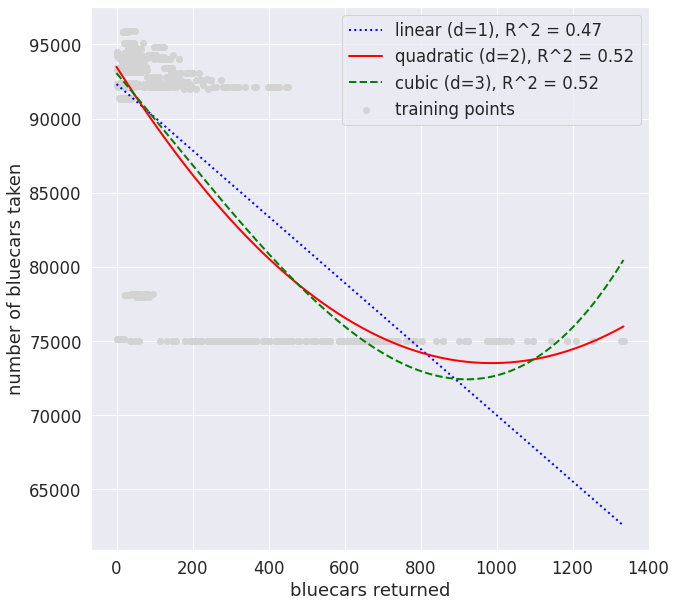

In [67]:

#Plotting the results
plt.figure(figsize=(10, 10))
plt.scatter(X, y, label='training points', color='lightgray')
plt.plot(
    X_fit, y_lin_fit,
    label=f'linear (d=1), R^2 = {linear_r2:.2f}',
    color='blue', lw=2, linestyle=':'
)
plt.plot(
    X_fit, y_quad_fit,
    label=f'quadratic (d=2), R^2 = {quadratic_r2:.2f}',
    color='red', lw=2, linestyle='-'
)
plt.plot(
    X_fit, y_cubic_fit,
    label=f'cubic (d=3), R^2 = {cubic_r2:.2f}',
    color='green', lw=2, linestyle='--'
)

plt.xlabel('bluecars returned')
plt.ylabel('number of bluecars taken')
plt.legend(loc='upper right')

y_cubic_fit
plt.show()

# **Plotting the results of polynominal regression**
As we can see from the resulting plot, the cubic fit captures the relationship between bluecars taken and bluecars returned in all weekends than the linear and quadratic fit.
However, if it was to add more polynomial features such as slots available for feeding as well as slots_taken_sum it would increase the complexity of a model and therefore increases the chance of overfitting. Thus, in practice it is always recommended to evaluate the performance of the model on a separate test dataset to estimate the generalization performance.

Now that we have made our model we need to know which features (variables) were really affecting the number of bluecars taken in our postal code of interest which was 75015.

In [69]:
autolib.head()


,Postalcode,date,ndailydatapoints,dayOfWeek,daytype,BlueCarstakensum,BlueCarsreturnedsum,Slotsfreedsum,Slotstakensum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


In [71]:
auto1_sample.shape


(1000, 9)

Now that we have sample of 1000 variable, I calculate the p-value from the sample. Sience the sample is greater than 30 we shall use **Z-TEST** to calculate the P_value in oder for us to either Accept or Reject my null hypothesis. I shall a use a significance value of 5%

If the p-value is less than 5%, then the null hypothesis is rejected let us assume, the number of bluecars taken from postal code 75015 are 120 every weekend. Formula

**Z = (x – μ) / (σ / √n)**
x= mean

μ= sample mean

σ= standard deviation

√n= square root of the numberof the samples

In [72]:
#Checking for the mean of bluecars in our sample
mean_z=auto1['BlueCarstakensum'].mean()
print('The average number of bluecars taken from postal code in the sample  taken are',mean_z)

The average number of bluecars taken from postal code in the sample  taken are 151.09006826690157


In [73]:
# checking for the standard deviation of the sample
std=auto1['BlueCarsreturnedsum'].std()
print(' The std is',std)

 The std is 221.1403371197894


In [74]:
# calculating the Z value
signal=(125.92695-mean_z)
#√1000=31.62277660
noise=(std/31.62277660)
z_score=(signal/noise)
print('Z score value is ',z_score)
# since our  Z score  value is  a negative value it means that our distribution curve  is LEFT TAIL

Z score value is  -3.5982927306589483


In [75]:
from scipy import stats
from scipy.stats import norm

In [76]:

p_value = 1 - stats.norm.cdf(z_score)
p_value
# after calculation of p value which is given as 1-significance level(0.05)
# we got 0.9998398435119654. This figure is greater than the significance level thus we will accept the null hypothesis.

0.9998398435119654

# **Distribution**

Now that we have gotten to know the actual mean of each postal code is 125.926951. What would be the probably of choosing a postal code whose mean is 125.926951 if the probability of choosing 30 postal codes of 100 postal is 80%

In [80]:
# we use binomial distribution
from scipy.stats import binom
mean =30
binom.pmf(mean, 100, 0.2)
#plt.bar([binom.pmf(30, 100, 0.8)])

0.005189643239948643